In [2]:
from average_streamline_calculation.turbine import Turbine, TurbineType, StageGeomAndHeatDrop, TurbineGeomAndHeatDropDistribution 
from profiling.profiling import TurbineProfiling, StageProfiling, ProfilingType, BladeSection
import pickle as pk
import numpy as np

In [3]:
def load(filename) -> Turbine:
    file = open(filename, 'rb')
    result = pk.load(file)
    file.close()
    return result

In [4]:
turbine = load(r'average_streamline_calculation\average_streamline_calculation_results')

In [5]:
turbine_profiling = TurbineProfiling(turbine, ProfilingType.ConstantAngle, pnt_count=30, r_rel=np.linspace(0, 1, 5))
st1 = turbine_profiling[0]
st2 = turbine_profiling[1]

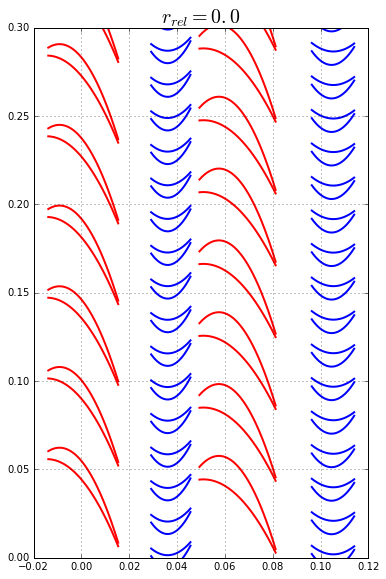

In [6]:
%matplotlib inline
deg = np.pi / 180
st1.r1_rk_rel = 0.04
st1.r1_sa_rel = 0.05
st1.s2_rk = 0.002
st1.s2_sa = 0.002
st1.maxdif_alpha0_l_gamma1_s_sa = 50 * deg
st1.mindif_beta1_l_gamma1_s_rk = 28 * deg
st1.maxdif_beta1_l_gamma1_s_rk = 40 * deg
st1.gamma1_k_rk_rel = 0.55
st1.min_t_rel_sa_in = 0.95
st1.min_t_rel_rk_in = 1.07

st2.r1_rk_rel = 0.04
st2.r1_sa_rel = 0.05
st2.s2_rk = 0.002
st2.s2_sa = 0.002
st2.mindif_alpha0_l_gamma1_s_sa = 17 * deg
st2.maxdif_alpha0_l_gamma1_s_sa = 45 * deg
st2.maxdif_beta1_l_gamma1_s_rk = 40 * deg
st2.mindif_beta1_l_gamma1_s_rk = 28 * deg
st2.gamma1_k_sa_rel = 0.35
st2.gamma1_k_rk_rel = 0.55
st2.min_t_rel_sa_in = 0.95
st2.min_t_rel_rk_in = 1.00
turbine_profiling.compute_profile()
turbine_profiling.save()
turbine_profiling.plot2d(r_rel=0.0, figsize=(6, 9.5), ymax=0.3)

In [7]:
st1.z_sa

20

In [8]:
st1.z_rk

48

In [9]:
st2.z_sa

21

In [10]:
st2.z_rk

45

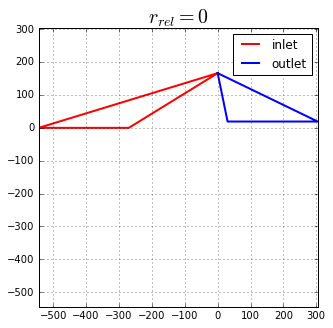

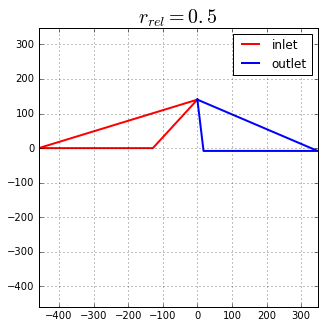

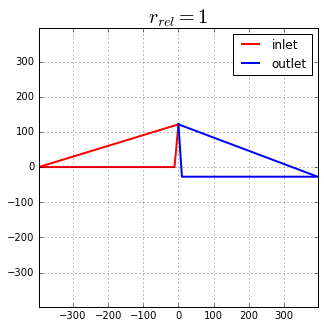

In [11]:
%matplotlib inline
turbine_profiling[0].plot_velocity_triangles(dirname='plots', filename='st1_triangles', figsize=(5, 5))

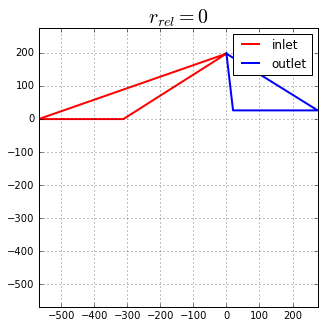

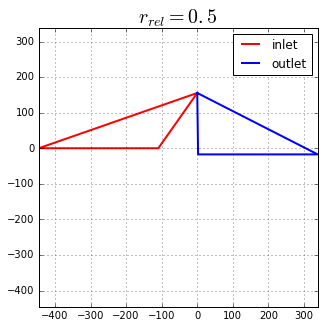

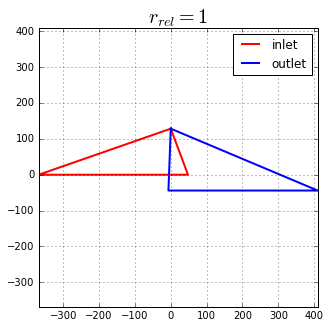

In [12]:
%matplotlib inline
turbine_profiling[1].plot_velocity_triangles(figsize=(5, 5))

<IPython.core.display.Javascript object>


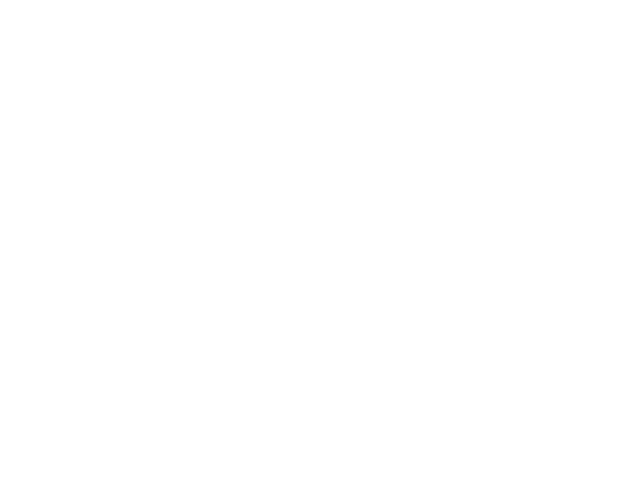

<IPython.core.display.Javascript object>


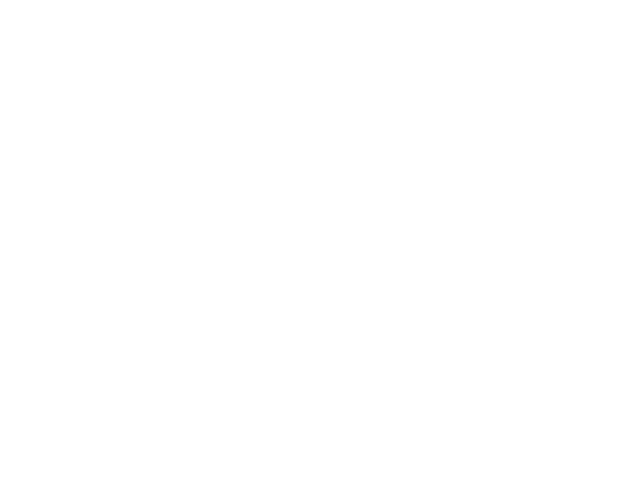

<IPython.core.display.Javascript object>


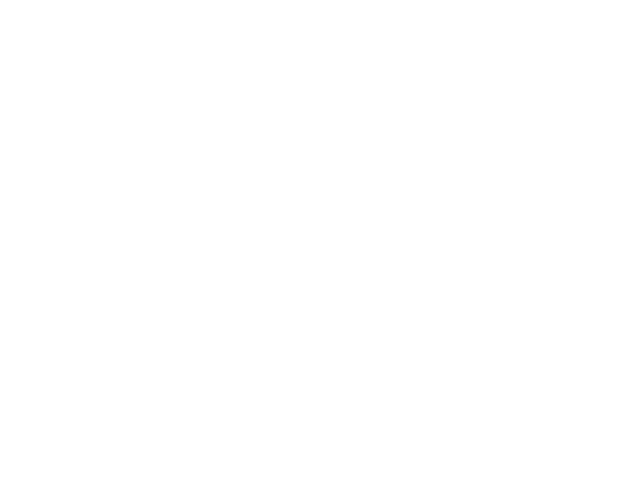

<IPython.core.display.Javascript object>


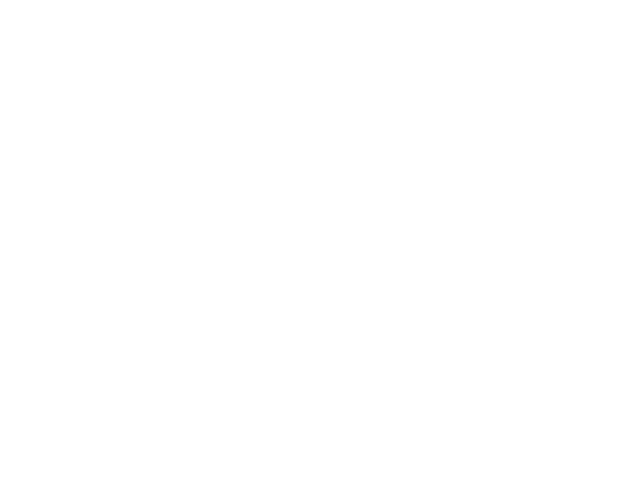

In [13]:
%matplotlib notebook
for n, i in enumerate(turbine_profiling):
    i.plot3d('Stage %s' % (n + 1), r_rel=np.linspace(0, 1, 10))

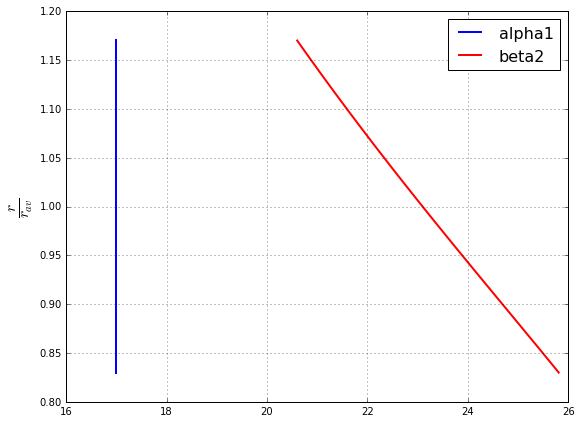

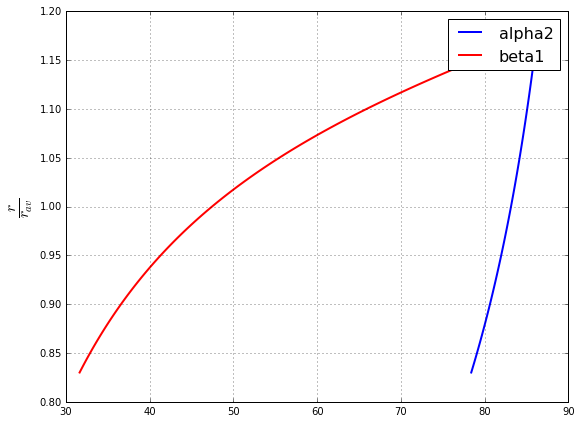

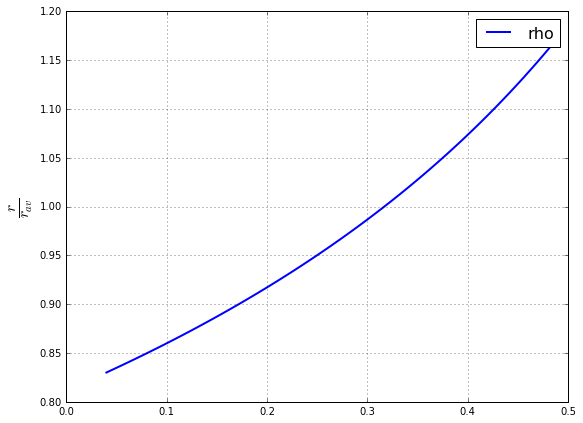

In [16]:
%matplotlib inline
st1.plot_parameter_distribution(r'plots\alpha1_beta2_st1', ['alpha1', 'beta2'], color=['blue', 'red'])
st1.plot_parameter_distribution(r'plots\alpha2_beta1_st1', ['alpha2', 'beta1'], color=['blue', 'red'])
st1.plot_parameter_distribution(r'plots\rho_st1', ['rho'], color=['blue'])